In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
###for the model and evaluation###
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
df_test = pd.read_csv("../input/playground-series-s4e2/test.csv")
df_train = pd.read_csv("../input/playground-series-s4e2/train.csv")
display(df_train.head())
print("\n")
print(f'Train lenght: {df_train.shape[0]}')
print(f'Test lenght: {df_test.shape[0]}')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II




Train lenght: 20758
Test lenght: 13840


Features related wih eating habits:

* FAVC: Frequent consumption of high caloric food;
* FCVC: Frequency of consumption of vegetables;
* NCP: Number of main meals;
* CAEC: Consumption of food between meals;
* CH20: Consumption of water daily;
* CALC: Consumption of alcohol.

Features related with the physical condition:

* SCC: Calories consumption monitoring
* FAF: Physical activity frequency;
* TUE: Time using technology devices;
* MTRANS: Transportation used.

In [4]:
#EDA on Data
df_train.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

It is a Multiclass Classification problem

In [6]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column . 
df_train['Gender']= label_encoder.fit_transform(df_train['Gender']) 
df_train['family_history_with_overweight']= label_encoder.fit_transform(df_train['family_history_with_overweight']) 
df_train['FAVC']= label_encoder.fit_transform(df_train['FAVC']) 
df_train['CAEC']= label_encoder.fit_transform(df_train['CAEC']) 
df_train['SMOKE']= label_encoder.fit_transform(df_train['SMOKE']) 
df_train['SCC']= label_encoder.fit_transform(df_train['SCC']) 
df_train['CALC']= label_encoder.fit_transform(df_train['CALC']) 
df_train['MTRANS']= label_encoder.fit_transform(df_train['MTRANS']) 
#df_train['NObeyesdad']= label_encoder.fit_transform(df_train['NObeyesdad']) 


In [7]:
df_train.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3,Obesity_Type_II
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3,Insufficient_Weight
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3,Obesity_Type_II
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0,Overweight_Level_II
20757,20757,1,26.680376,1.816547,118.134898,1,1,3.000000,3.000000,2,0,2.003563,0,0.684487,0.713823,1,3,Obesity_Type_II


In [8]:
df_corr=df_train.drop(['id','NObeyesdad'], axis=1)

<Axes: >

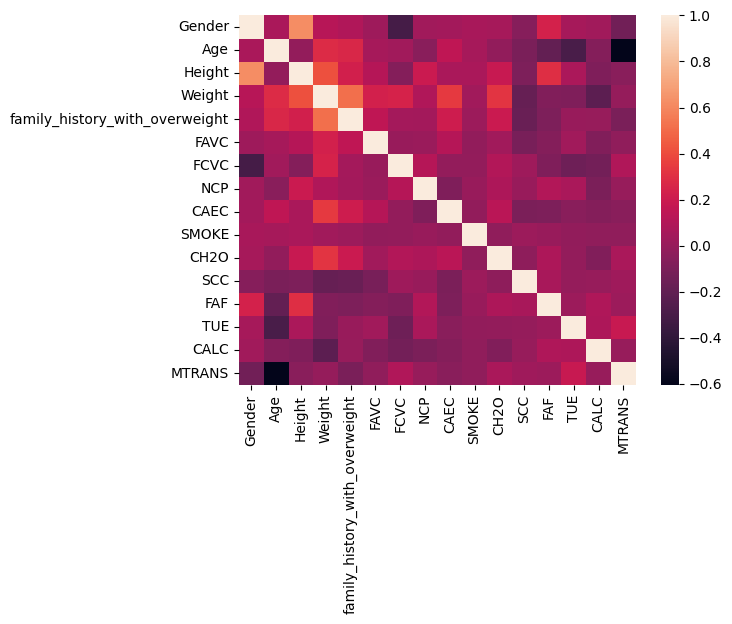

In [9]:
import seaborn as sns
%matplotlib inline

# load the Auto dataset
auto_df = sns.load_dataset('mpg')

# calculate the correlation matrix on the numeric columns
corr = df_corr.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)


In [10]:
from sklearn.ensemble import RandomForestClassifier

y = df_train["NObeyesdad"]

features = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']
X = df_train[features]
X_val = df_test[features]

In [11]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 89.93%


In [13]:
# Encode labels in column . 
X_val['Gender']= label_encoder.fit_transform(X_val['Gender']) 
X_val['family_history_with_overweight']= label_encoder.fit_transform(X_val['family_history_with_overweight']) 
X_val['FAVC']= label_encoder.fit_transform(X_val['FAVC']) 
X_val['CAEC']= label_encoder.fit_transform(X_val['CAEC']) 
X_val['SMOKE']= label_encoder.fit_transform(X_val['SMOKE']) 
X_val['SCC']= label_encoder.fit_transform(X_val['SCC']) 
X_val['CALC']= label_encoder.fit_transform(X_val['CALC']) 
X_val['MTRANS']= label_encoder.fit_transform(X_val['MTRANS']) 


predictions = model.predict(X_val)

output = pd.DataFrame({ 'Survived': predictions})


/tmp/ipykernel_18/2126042866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Gender']= label_encoder.fit_transform(X_val['Gender'])
/tmp/ipykernel_18/2126042866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['family_history_with_overweight']= label_encoder.fit_transform(X_val['family_history_with_overweight'])
/tmp/ipykernel_18/2126042866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [14]:
submission_df=pd.merge(df_test['id'],output , left_index=True, right_index=True)
submission_df.head()

,id,Survived
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [15]:
submission_df.to_csv('submission.csv', index=False)
print("Random Forest Submission")

Random Forest Submission
